### Import

spliting and training

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('/content/sample_data/twcs.csv')

# Drop irrelevant columns
df = df.drop(['tweet_id', 'author_id', 'created_at', 'response_tweet_id', 'in_response_to_tweet_id'], axis=1)

# Handle missing values
df = df.dropna()

# Text preprocessing
def clean_text(text):
    # Remove special characters and links
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'http\S+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    return ' '.join(stemmed_tokens)

df['clean_text'] = df['text'].apply(clean_text)

# Encode categorical variables (if applicable)
# You can use one-hot encoding or label encoding for categorical columns

# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = df['clean_text']
y = df['inbound']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature extraction using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
df.head()

,inbound,text,clean_text
0,False,@115712 I understand. I would like to assist y...,115712 understand would like assist would need...
1,True,@sprintcare and how do you propose we do that,sprintcar propos
2,True,@sprintcare I have sent several private messag...,sprintcar sent sever privat messag one respond...
3,False,@115712 Please send us a Private Message so th...,115712 pleas send us privat messag assist clic...
4,True,@sprintcare I did.,sprintcar


### Graphs

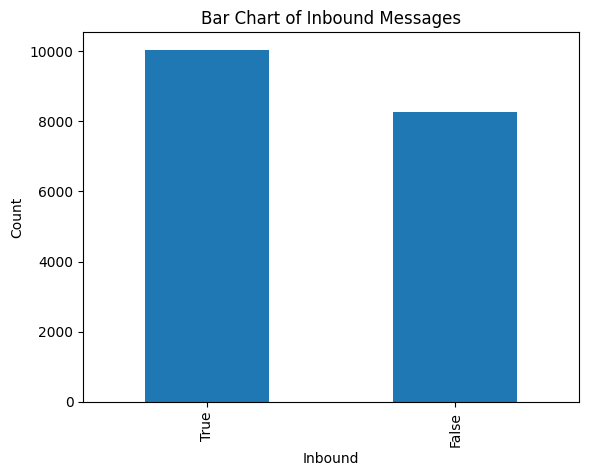

In [ ]:
# Plot a bar chart of the count of inbound messages
df['inbound'].value_counts().plot(kind='bar')
plt.xlabel('Inbound')
plt.ylabel('Count')
plt.title('Bar Chart of Inbound Messages')
plt.show()

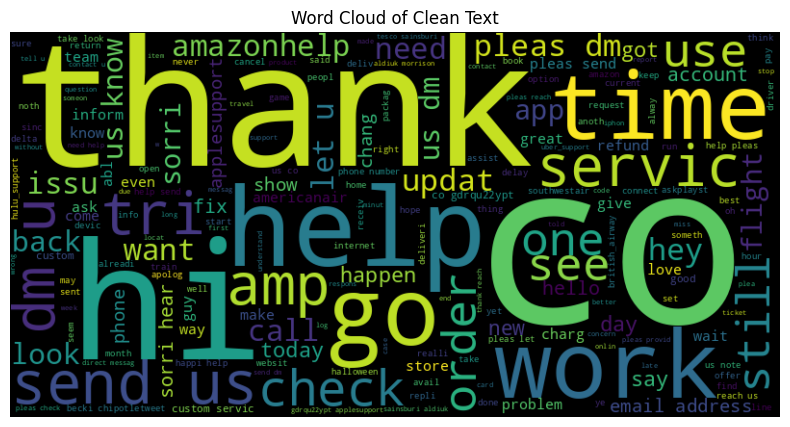

In [ ]:
from wordcloud import WordCloud

# Concatenate all clean_text
text = ' '.join(df['clean_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Clean Text')
plt.show()

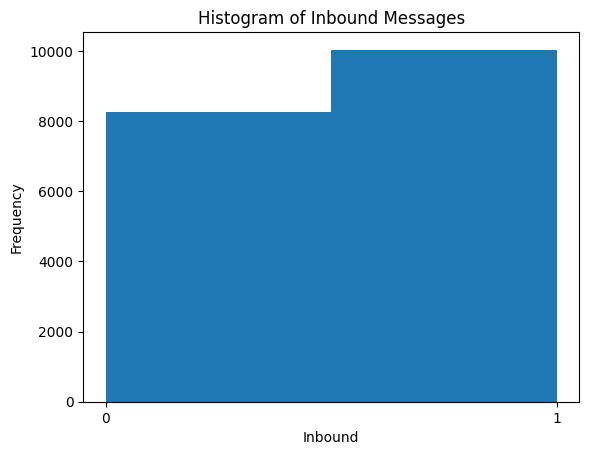

In [ ]:

# Plot a histogram of the "inbound" column
df['inbound'].astype(int).plot(kind='hist', bins=2)
plt.xlabel('Inbound')
plt.ylabel('Frequency')
plt.title('Histogram of Inbound Messages')
plt.xticks([0, 1])
plt.show()

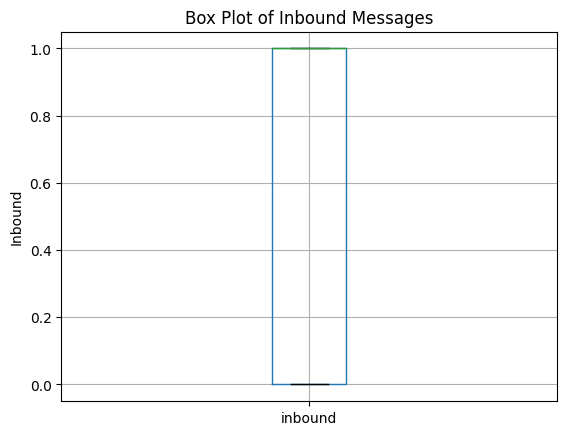

In [ ]:
# Plot a box plot of the "inbound" column
df.boxplot(column='inbound')
plt.ylabel('Inbound')
plt.title('Box Plot of Inbound Messages')
plt.show()


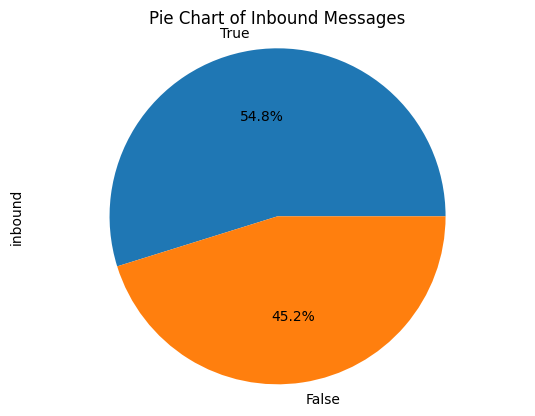

In [ ]:
# Count the occurrences of each category
inbound_counts = df['inbound'].value_counts()

# Plot a pie chart of the "inbound" column
inbound_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Pie Chart of Inbound Messages')
plt.show()

## Machine Learning Techniques

### Linear SVM

In [ ]:
# Train a LinearSVC classifier
classifier = LinearSVC()
classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vec)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.974745417515275


### Random Forest

In [ ]:
# Train a Random Forest classifier
classifier = RandomForestClassifier()
classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vec)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9279022403258655


### ROC Curve

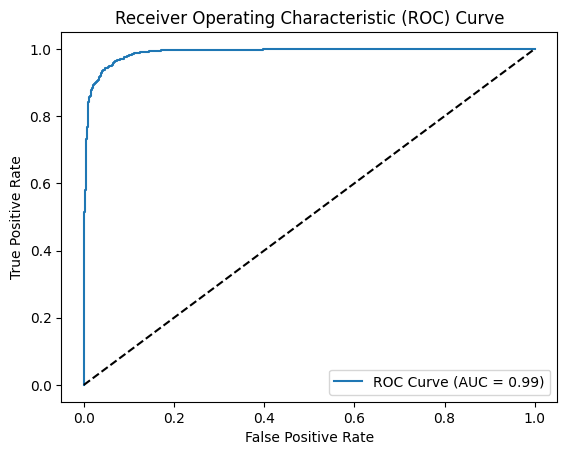

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_scores = classifier.predict_proba(X_test_vec)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate the AUC (Area Under the ROC Curve)
auc = roc_auc_score(y_test, y_scores)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train a k-Nearest Neighbors classifier
k = 5  # Specify the desired number of neighbors
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vec)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9010183299389002


### Recall,f1score

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Feature extraction using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train a Logistic Regression classifier
classifier = LogisticRegression()

# Perform cross-validation and calculate metrics
scoring = ['accuracy', 'recall', 'f1']
cv_results = cross_validate(classifier, X_vec, y, scoring=scoring, cv=5)

# Get the average scores across all folds
average_accuracy = cv_results['test_accuracy'].mean()
average_recall = cv_results['test_recall'].mean()
average_f1 = cv_results['test_f1'].mean()

# Print the average scores
print("Average Accuracy:", average_accuracy)
print("Average Recall:", average_recall)
print("Average F1 Score:", average_f1)

Average Accuracy: 0.930346232179226
Average Recall: 0.9746923164519817
Average F1 Score: 0.9391264350852293


### Logistic Regression

In [ ]:
# Train a Logistic Regression classifier
classifier = LogisticRegression()
classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_vec)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9441955193482688
